/usr/local/Anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


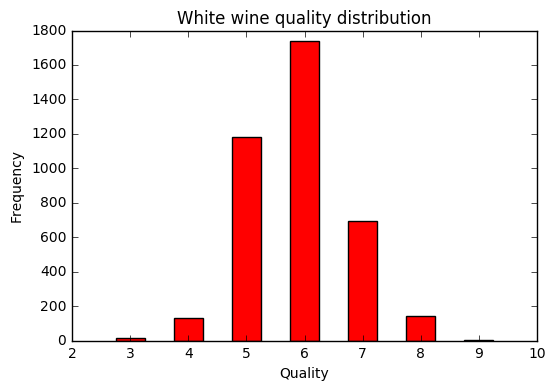

Mean Square Error for train data simple method:
0.795421570996


Mean Square Error for test data simple method:
0.739404610626


Mean Square Error for train data linear model
0.565591862974


Mean Square Error for test data linear model
0.55502947826




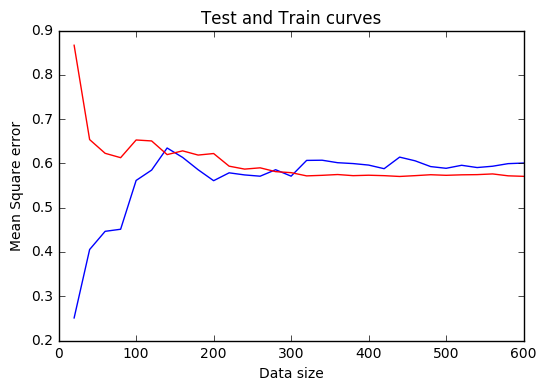

Best results for ridge are for following values of lambda and degree
10.0
2


Best results for lasso are for following values of lambda and degree
0.001
2


Ridge Train Mean Square Error for best parameters on the whole dataset
0.497323612265


Ridge Test Mean Square Error for best parameters on the whole dataset
0.500577189944


Lasso Train Mean Square Error for best parameters on the whole dataset
0.49798905566


Lasso Test Mean Square Error for best parameters on the whole dataset
0.500102846337




In [4]:
import cPickle as cp
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X, y = cp.load(open('winequality-white.cPickle','rb'))

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

# Handin 1: Creating the bar chart for y_train

quality=range(3, 10)
frequency=np.zeros(7)
for i in y_train:
	frequency[i-3]+=1
width=0.5
plt.bar(quality, frequency, width, align='center', color='r')
plt.title('White wine quality distribution')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

# Handin 2: Mean squared error for simple predictor

y_mean=np.mean(y_train)
SqErr_train=(y_train-y_mean)**2
SqErr_train_Mean=np.mean(SqErr_train)
print('Mean Square Error for train data simple method:')
print(SqErr_train_Mean)
print('\n')

SqErr_test=(y_test-y_mean)**2
SqErr_test_Mean=np.mean(SqErr_test)
print('Mean Square Error for test data simple method:')
print(SqErr_test_Mean)
print('\n')


# Handin 3: Linear Model Using Least Squares

# Calculating the mean and std for training data
X_train_means=np.mean(X_train, axis=0)
X_train_std=np.std(X_train, axis=0)

# Standardising the training and test data
X_train_stand=(X_train-X_train_means)/X_train_std
X_test_stand=(X_test-X_train_means)/X_train_std

# Adding a columnt of 1's to both matrices
X_train_stand_ones=np.c_[np.ones(N_train), X_train_stand]
X_test_stand_ones=np.c_[np.ones(N_test), X_test_stand]

w=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train_stand_ones), X_train_stand_ones)), np.transpose(X_train_stand_ones)), y_train)

y_cap_test=np.dot(X_test_stand_ones, w)
y_cap_train=np.dot(X_train_stand_ones, w)


SqErr_train=(y_train-y_cap_train)**2
SqErr_train_Mean=np.mean(SqErr_train)
print('Mean Square Error for train data linear model')
print(SqErr_train_Mean)
print('\n')

SqErr_test=(y_test-y_cap_test)**2
SqErr_test_Mean=np.mean(SqErr_test)
print('Mean Square Error for test data linear model')
print(SqErr_test_Mean)
print('\n')

# Handin 4: Learning curves

datapoints=range(20, 601, 20)
SqErr_train_curve=np.zeros(30)
SqErr_test_curve=np.zeros(30)

# This for loop will basicaly do the whole practical for each iteration
for i in datapoints:
    N_train = i
    N_test = N - N_train
    
    X_train = X[:N_train]
    y_train = y[:N_train]
    X_test = X[N_train:]
    y_test = y[N_train:]
    
    X_train_means=np.mean(X_train, axis=0)
    X_train_std=np.std(X_train, axis=0)

    X_train_stand=(X_train-X_train_means)/X_train_std
    X_test_stand=(X_test-X_train_means)/X_train_std

    X_train_stand_ones=np.c_[np.ones(N_train), X_train_stand]
    X_test_stand_ones=np.c_[np.ones(N_test), X_test_stand]

    w=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train_stand_ones), X_train_stand_ones)), np.transpose(X_train_stand_ones)), y_train)

    y_cap_test=np.dot(X_test_stand_ones, w)
    y_cap_train=np.dot(X_train_stand_ones, w)
    
    SqErr_train=(y_train-y_cap_train)**2
    SqErr_train_curve[i/20-1]=np.mean(SqErr_train)

    SqErr_test=(y_test-y_cap_test)**2
    SqErr_test_curve[i/20-1]=np.mean(SqErr_test)
    
plt.plot(datapoints, SqErr_train_curve, 'b', datapoints, SqErr_test_curve, 'r')
plt.title('Test and Train curves')
plt.xlabel('Data size')
plt.ylabel('Mean Square error')
plt.show()

# Handin 5: Ridge and Lasso (Optional)

lambda_range = [np.power(10, float(x)) for x in range(-5, 6)]
degree = [2, 3, 4]

# Splitting the data
N_train = int(0.8 * N)
N_test = N - N_train
N_train_nonval = int(0.8 * N_train)
N_val=N_train-N_train_nonval

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

# Calculating the mean and std for training data
X_train_means=np.mean(X_train, axis=0)
X_train_std=np.std(X_train, axis=0)

# Standardising the training and test data
X_train_stand=(X_train-X_train_means)/X_train_std
X_test_stand=(X_test-X_train_means)/X_train_std

X_train_nonval = X_train_stand[:N_train_nonval]
y_train_nonval = y_train[:N_train_nonval]
X_val = X_train_stand[N_train_nonval:]
y_val = y_train[N_train_nonval:]

#Initialisation of paramenters
final_lambda_ridge = lambda_range[0]
final_lambda_lasso = lambda_range[0]

final_degree_ridge = degree[0]
final_degree_lasso = degree[0]

lasso_err=2000
ridge_err=2000

# Going through all lambdas and degrees
for i in lambda_range:
    for j in degree:
        
        # Ridge
        res = Ridge(alpha=i)
        pf = PolynomialFeatures(j)
        X_train_nonval_ex = pf.fit_transform(X_train_nonval)
        X_val_ex = pf.fit_transform(X_val)

        res.fit(X_train_nonval_ex, y_train_nonval)
        y_hat = res.predict(X_val_ex)
        SqErr=(y_val-y_hat)**2
        MeanSqErr=np.mean(SqErr)
        
        if MeanSqErr <= ridge_err:
            ridge_err = MeanSqErr
            final_lambda_ridge = i
            final_degree_ridge = j
        
        # Lasso
        res = Lasso(alpha=i)
        pf = PolynomialFeatures(j)
        X_train_nonval_ex = pf.fit_transform(X_train_nonval)
        X_val_ex = pf.fit_transform(X_val)

        res.fit(X_train_nonval_ex, y_train_nonval)
        y_hat = res.predict(X_val_ex)
        SqErr=(y_val-y_hat)**2
        MeanSqErr=np.mean(SqErr)
        
        if MeanSqErr <= lasso_err:
            lasso_err = MeanSqErr
            final_lambda_lasso = i
            final_degree_lasso = j
            
print('Best results for ridge are for following values of lambda and degree')
print(final_lambda_ridge)
print(final_degree_ridge)
print('\n')

print('Best results for lasso are for following values of lambda and degree')
print(final_lambda_lasso)
print(final_degree_lasso)
print('\n')


# Full set training

#Ridge
res = Ridge(alpha=final_lambda_ridge)
pf = PolynomialFeatures(final_degree_ridge)
X_train_ex = pf.fit_transform(X_train_stand)
X_test_ex = pf.fit_transform(X_test_stand)

res.fit(X_train_ex, y_train)

y_hat = res.predict(X_train_ex)
SqErr=(y_train-y_hat)**2
MeanSqErr=np.mean(SqErr)

print('Ridge Train Mean Square Error for best parameters on the whole dataset')
print(MeanSqErr)
print('\n')

y_hat = res.predict(X_test_ex)
SqErr=(y_test-y_hat)**2
MeanSqErr=np.mean(SqErr)

print('Ridge Test Mean Square Error for best parameters on the whole dataset')
print(MeanSqErr)
print('\n')

#Lasso
res = Lasso(alpha=final_lambda_lasso)
pf = PolynomialFeatures(final_degree_lasso)
X_train_ex = pf.fit_transform(X_train_stand)
X_test_ex = pf.fit_transform(X_test_stand)

res.fit(X_train_ex, y_train)

y_hat = res.predict(X_train_ex)
SqErr=(y_train-y_hat)**2
MeanSqErr=np.mean(SqErr)

print('Lasso Train Mean Square Error for best parameters on the whole dataset')
print(MeanSqErr)
print('\n')

y_hat = res.predict(X_test_ex)
SqErr=(y_test-y_hat)**2
MeanSqErr=np.mean(SqErr)

print('Lasso Test Mean Square Error for best parameters on the whole dataset')
print(MeanSqErr)
print('\n')



#print(np.mean(X_train_stand, axis=0))
#print(np.std(X_train_stand, axis=0))

#x=np.array([[1,2,3],[4,5,6]])
#print(x)
#xx=np.array([1,2,3])
#print(xx)
#xxx=x-xx
#print(xxx)